In [58]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
# Setting the current working directory
import os; os.chdir('/content/drive/MyDrive/AI_ML/Projects/Capstone-NLP/')

### Importing the Packages

In [60]:
# Importing the libraries
# load packages
import os
from flask import Flask, flash, request, redirect, url_for
from werkzeug.utils import secure_filename

import flask
app = flask.Flask(__name__)
from flask import Flask, render_template, request

import pickle

#%tensorflow_version 1.x

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
from tensorflow.keras import backend as K

# import keras.layers as layers
# from keras.models import Model
# from keras import backend as K
# from keras.models import load_model

print(tf.__version__)

2.4.1


In [61]:
#UPLOAD_FOLDER = '/path/to/the/uploads'

UPLOAD_FOLDER = '/content/drive/MyDrive/AI_ML/Projects/Capstone-NLP/'

#ALLOWED_EXTENSIONS = {'txt', 'pdf', 'png', 'jpg', 'jpeg', 'gif'}

ALLOWED_EXTENSIONS = {'csv'}

In [62]:
!mkdir templates -p

In [63]:
#!ls

In [64]:
%%writefile templates/prediction.html

<!DOCTYPE html>

<div class="form_main">

<h4 class="heading"><strong> Industrial-safety-and-health-analytics-database  </strong> <span></span></h4>

<div class="header">
  <h3>The Accident Severity Level is {{ prediction }}</h3>
</div>


<style>

form_main {
      width: 100%;
  }
  .form_main h4 {
      font-family: roboto;
      font-size: 20px;
      font-weight: 300;
      margin-bottom: 15px;
      margin-top: 20px;
      text-transform: uppercase;
  }
  
    .form_main h3 {
      font-family: roboto;
      font-size: 20px;
      font-weight: 300;
      margin-bottom: 15px;
      margin-top: 20px;
      
  }
  
  .heading {
      border-bottom: 1px solid #fcab0e;
      padding-bottom: 9px;
      position: relative;
	  text-align: center
  }
  .heading span {
      background: #9e6600 none repeat scroll 0 0;
      bottom: -2px;
      height: 3px;
      left: 0;
      position: absolute;
      width: 75px;
  }
  .form {
      border-radius: 7px;
      padding: 6px;
  }


</style>


Overwriting templates/prediction.html


In [65]:
%%writefile templates/result.html

<!doctype html>
<html>
   <body>
        <div 
          <h2>There is a {{ result }} </h2>
        </div>
   </body>
</html>

Overwriting templates/result.html


In [66]:
%%writefile templates/search_page.html

<!DOCTYPE html>

<div class="form_main">

<h4 class="heading"><strong>Industrial-safety-and-health-analytics-database </strong> <span></span></h4>

<div id="search-info">
  <h3>Accident Severity Level predictor</h3>
</div>

<div id="search-info">
  <h3>A) Milestone-1)-Tasks</h3>
</div>


<div id="search-info">
  <h4>0) Dataset Upload </h4>
</div>

<div class="form-style-8">
  <form id="load_form" action="/upload" method="POST" target="_blank" enctype=multipart/form-data>
	    <input type = "file" name = "file" />
		  <input type = "submit" value="Submit" name="Sumbit" class="txt2"/>
  </form>
</div>


<div id="search-info">
  <h4>1) Import dataset into DataFrame</h4>
</div>

<div class="form-style-8">
  <form id="load_form" action="/import" method="POST" target="_blank" enctype=multipart/form-data>
	   <input type="submit" value="Import dataset" name="Sumbit" class="txt2">
  </form>
</div>


<div id="search-info">
  <h4>2) Dataset Cleaning</h4>
</div>

	<div class="form-style-8">
	  <form id="Clean" action="/clean" method="POST" target="_blank" enctype=multipart/form-data>
		  <input type="submit" value="Clean Dataset" name="Sumbit" class="txt2">
	  </form>
	</div>


<div id="search-info">
	<h3>B) Milestone-2-Tasks</h3>
</div>

<div id="search-info">
  <h4>3) Design, train and test for LSTM </h4>
</div>
	<div class="form-style-8">
	  <form id="search_form" action="/all" method="POST" target="_blank">
		<input type="submit" value="PreProcess_Train" name="Sumbit" class="txt2">
	  </form>
 </div>

<div id="search-info">
  <h4>4) Prediction with LSTM</h4>
</div>
	<div class="form-style-8">
	  <form id="search_form" action="/predict" method="POST" target="_blank">
	
		<input type="text" required="" placeholder="input_str" value="" name="input_str"
                                  class="txt">
        <input type="submit" value="Predict with Glove_LSTM" name="Sumbit" class="txt2">
	  </form>
 </div>

  
<script src="https://ajax.googleapis.com/ajax/libs/jquery/1.11.1/jquery.min.js"></script>
<script src="https://maxcdn.bootstrapcdn.com/bootstrap/3.2.0/js/bootstrap.min.js"></script>

<script>

window.onload = function() {
  jQuery(document).keypress(function(e) {
    if (e.keyCode == 13) {
      e.preventDefault();
      jQuery('#SubmitButton').click();
    }
  });
}

</script>

<style>

label {
  background-color: indigo;
  color: white;
  padding: 0.5rem;
  font-family: sans-serif;
  border-radius: 0.3rem;
  cursor: pointer;
  margin-top: 1rem;
}



h1{
  font-weight: bold;
  font-size: 2em;
  font-family: 'Raleway', sans-serif;
  margin: 0;
  margin-top: 1px;
  color: black;
  text-align: center;
  
}

h2{
  font-weight: bold;
  font-size: 1em;
  font-family: 'Raleway', sans-serif;
  margin: 0 auto;
  margin-top: 10px;
  width: 1000px;
  color: black;
  text-align: left;

}

h3 {
  text-align: left;
  padding-left: 3%;
  font-size: 1.0em;
  font-weight: bold;
  color: black;
  font-family: 'Raleway', sans-serif;
  background-color: lightblue
}

h4 {
  text-align: left;
  padding-left: 3%;
  font-size: 0.8em;
  font-weight: bold;
  color: black;
  font-family: 'Sniglet', monospace;
}

#search-info {
  text-align: center;
  font-family: 'Proxima Nova', sans-serif;
  color: #0077cc;
  font-size: 24px;
  font-weight: 100;
  padding: 20px;
  margin: -30px -30px -10px -30px;
}



form_main {
      width: 100%;
  }
  .form_main h4 {
      font-family: roboto;
      font-size: 20px;
      font-weight: 300;
      margin-bottom: 15px;
      margin-top: 20px;
      text-transform: uppercase;
  }
  
    .form_main h3 {
      font-family: roboto;
      font-size: 20px;
      font-weight: 300;
      margin-bottom: 15px;
      margin-top: 20px;
      text-transform: uppercase;
  }
  
  .heading {
      border-bottom: 1px solid #fcab0e;
      padding-bottom: 9px;
      position: relative;
	  text-align: center
  }
  .heading span {
      background: #9e6600 none repeat scroll 0 0;
      bottom: -2px;
      height: 3px;
      left: 0;
      position: absolute;
      width: 75px;
  }
  .form {
      border-radius: 7px;
      padding: 6px;
  }
  .txt[type="text"] {
      border: 1px solid #ccc;
      margin: 10px 0;
      padding: 10px 0 10px 5px;
      width: 100%;
  }
  .txt_3[type="text"] {
      margin: 10px 0 0;
      padding: 10px 0 10px 5px;
      width: 100%;
  }
  .txt2[type="submit"] {
      background: #242424 none repeat scroll 0 0;
      border: 1px solid #4f5c04;
      border-radius: 25px;
      color: #fff;
      font-size: 16px;
      font-style: normal;
      line-height: 35px;
      margin: 10px 0;
      padding: 0;
      text-transform: uppercase;
      width: 20%;
  }
  .txt2:hover {
      background: rgba(0, 0, 0, 0) none repeat scroll 0 0;
      color: #5793ef;
      transition: all 0.5s ease 0s;
  }

  .notice {
      padding: 15px;
      background-color: #fafafa;
      border-left: 6px solid #7f7f84;
      margin-bottom: 10px;
      -webkit-box-shadow: 0 5px 8px -6px rgba(0,0,0,.2);
         -moz-box-shadow: 0 5px 8px -6px rgba(0,0,0,.2);
              box-shadow: 0 5px 8px -6px rgba(0,0,0,.2);
  }
  .notice-sm {
      padding: 10px;
      font-size: 80%;
  }
  .notice-lg {
      padding: 35px;
      font-size: large;
  }
  .notice-success {
      border-color: #80D651;
  }
  .notice-success>strong {
      color: #80D651;
  }
  .notice-info {
      border-color: #45ABCD;
  }
  .notice-info>strong {
      color: #45ABCD;
  }
  .notice-warning {
      border-color: #FEAF20;
  }
  .notice-warning>strong {
      color: #FEAF20;
  }
  .notice-danger {
      border-color: #d73814;
  }
  .notice-danger>strong {
      color: #d73814;
  }
  
</style>

Overwriting templates/search_page.html


In [67]:
!pip install flask-ngrok

In [68]:
#load model preprocessing
import numpy as np
import pandas as pd
import pickle
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import keras.models
from keras.models import model_from_json

In [69]:
def prepData(text):
    # Convert to array
    textDataArray = [text]
    
    # Convert into list with word ids
    Features = tokenizer.texts_to_sequences(textDataArray)
    Features = pad_sequences(Features, 20, padding='post')
    
    return Features

In [70]:
from flask_ngrok import run_with_ngrok 

app = Flask(__name__) 
app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER
run_with_ngrok(app)   

In [71]:
# new_text = ['text_entered', '1', '2']
# type(new_text)
# new_text = np.array(new_text, dtype=object)[:, np.newaxis]
# new_text.shape

In [72]:
# names =[]
# new = 'text'
# new = ['DowDuPont', 'Alphabet Inc', new]
# #names.extend(more_elements)
# print(new)

##**Function Helpers**

In [73]:
import keras
from keras.models import load_model

def allowed_file(filename):
    return '.' in filename and \
           filename.rsplit('.', 1)[1].lower() in ALLOWED_EXTENSIONS

@app.route('/upload', methods = ['GET', 'POST'])
def upload():
    if request.method == 'POST':  
        f = request.files['file']  
        f.save(secure_filename(f.filename))
        pickle.dump( f, open( "raw_data.p", "wb" ) )
        return "File Uploaded Successfully"  


@app.route('/import', methods=['GET', 'POST'])
def load_dataset():
  #data = pickle.load( open( "raw_data.p", "rb" ) )
  #data = pickle.load( open( "raw_data.p", "rb" ) )
  #pickle.dump( data, open( "raw_data.p", "wb" ) )
  #df = pd.read_pickle(data)
  data = pd.read_csv("IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv")
  html = data.to_html()
  return html
  #return "Data Uploaded Successfully in Dataframe"


@app.route('/clean', methods=['GET', 'POST'])
def data_clean():
  data = pd.read_csv("IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv")
  #data = pickle.load( open( "raw_data.p", "rb" ) )
  data.drop("Unnamed: 0", axis=1, inplace=True)
  data.rename(columns={'Data':'Date', 'Countries':'Country', 'Genre':'Gender', 'Employee or Third Party':'Employee type'}, inplace=True)
  replace_values = {'Local_01': 1, 'Local_02': 2, 'Local_03': 3, 'Local_04': 4, 'Local_05': 5, 'Local_06': 6, 'Local_07': 7, 'Local_08': 8, 'Local_09': 9, 'Local_10': 10, 'Local_11': 11, 'Local_12': 12}
  data['Local'] = data['Local'].map(replace_values)
  replace_values = {'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5}
  data['Accident Level'] = data['Accident Level'].map(replace_values)
  replace_values = {'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5, 'VI': 6}
  data['Potential Accident Level'] = data['Potential Accident Level'].map(replace_values)
  del replace_values
  pickle.dump( data, open( "clean_data.p", "wb" ) )
  html = data.to_html()
  #return "File Cleaned Successfully"
  return html

# @app.route('/test_nlp_preprocess', methods=['GET', 'POST'])
# def data_for_nlp():
#   data = pickle.load( open( "clean_data.p", "rb" ) )
#   html = data.to_html()
#   return html

# @app.route('/result', methods=['GET', 'POST'])
# def result():
#    if request.method == 'POST':
#       result = request.form.get('result')
#       #return "You entered "+result
#       return render_template("result.html", result = result)

# @app.route('/predicts_USE', methods=['GET','POST'])
# def predicts_use():
#     if request.method=='POST':
#       new_text = request.form.get('text_entered')
#       new_text = np.array(new_text, dtype=object)[:, np.newaxis]
#       model.load_weights('./model_lstm.h5')  
#       predicts = model.predict(new_text, batch_size=32)
#       categories = df_train[target].cat.categories.tolist()
#       predict_logits = predicts.argmax(axis=1)
#       predict_labels = [categories[logit] for logit in predict_logits]
#       prediction = predict_labels[0]
#       return prediction
#       #return render_template('prediction.html', prediction='prediction')

# @app.route('/', methods = ['GET', 'POST'])
# def predicts(new_text):
#   pass

@app.route('/', methods = ['GET', 'POST'])
def home():
  return render_template("search_page.html")

@app.route('/predicts_use', methods = ['GET', 'POST'])
def predicts_use():
    import tensorflow as tf
    import tensorflow_hub as hub
    import tensorflow.compat.v1 as tf
    from tensorflow.keras import Model
    from tensorflow.keras import layers
    from tensorflow.keras import backend as K
    graph = tf.Graph() #https://stackoverflow.com/questions/52392407/tensorflow-module-must-be-applied-in-the-graph-it-was-instantiated-for
    
    if request.method=='POST':
        prediction = []
        prediction = request.form.get('prediction')
        prediction = [prediction, 'text', 'text']
        print(type(prediction))
        print(prediction)
        prediction = np.array(prediction, dtype=object)[:, np.newaxis]
        graph = tf.Graph()
        with tf.Session(graph = graph) as session:
           K.set_session(session)
           session.run([tf.global_variables_initializer(), tf.tables_initializer()])
           embed = hub.Module("https://tfhub.dev/google/universal-sentence-encoder-large/3")
           
          #  def UniversalEmbedding(x):
          #    import tensorflow as tf
          #    return embed(tf.squeeze(tf.cast(x, tf.string)), signature="default", as_dict=True)["default"]

          #  embed_size = embed.get_output_info_dict()['default'].get_shape()[1].value
          #  print(embed_size)
          #  input_text = layers.Input(shape=(1,), dtype="string")
          #  embedding = layers.Lambda(UniversalEmbedding,output_shape=(embed_size,))(input_text)
           
           message_embeddings = session.run(embed(tf.cast(prediction, dtype=tf.string, name=None)))
           print(message_embeddings)
           return render_template('prediction.html', prediction = prediction )






In [74]:
#Load, Clean, Pre-Process, Split, Train, Test, Create Embedding, Build Model, Save Model
@app.route('/all', methods=['GET', 'POST'])
def all():
  from preprocess_train_v1 import preprocess_data, create_save_w2v_embedding, train_save_w2_model
  data = pd.read_csv('data.csv')
  df = preprocess_data(data)
  w2v_embedding_file = 'embedding_word2vec.txt'
  w2v_model_dir = 'w2v_model_dir'
  desc_lines = create_save_w2v_embedding(w2v_embedding_file, df)
  train_save_w2_model(df, w2v_embedding_file, desc_lines, w2v_model_dir)
  return "Load, Clean, Pre-Process, Split, Train, Test, Create Embedding, Build Model, Save Model Completed Successfully"



In [75]:
#Predict:
@app.route('/predict', methods=['GET', 'POST'])
def predict():
   from preprocess_train_v1 import predict
   if request.method == 'POST':
      input_str = request.form.get('input_str')
      w2v_embedding_file = "embedding_word2vec.txt"
      w2v_model_dir = "w2v_model_dir"
      input_str = predict(input_str, w2v_model_dir, w2v_embedding_file)
      #return "You entered "+result
      #return render_template("result.html", result = prediction)
      #html = prediction.to_html()
      #return("Prediction: ".format(input_str))
      return render_template('prediction.html', prediction=input_str)
      #return render_template('search.html', prediction=input_str)
      #result["sim_msg"] = input_str
      #return render_template("search.html", result=result)


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://7531db3a8033.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [25/Apr/2021 06:27:16] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [25/Apr/2021 06:27:16] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [25/Apr/2021 06:27:17] "POST /import HTTP/1.1" 200 -
127.0.0.1 - - [25/Apr/2021 06:27:24] "POST /clean HTTP/1.1" 200 -


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Shape of input data: (425, 11)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value



 Longest line at idx: 174

 Length of longest line: 622

 Longest line:: level gallery hold activity bolter equipment no operator perform drill first hole support right gable drill end drill rod break leave thread inside drill machine shank operator assistant decide make two empty percussion attempt free thread shank without success third attempt assistant enter corrugate iron central hole rest bar embed shank generate pressure moment operator activate percussion generate movement shank hit palm victim leave hand generate describe injury worker wear safety gloves time accident end corrugate iron contact leave hand shape like cane worker time accident position roof support mesh split set
Vocabulary size: 2372

: Saving model file: embedding_word2vec.txt

 Found 2372 unique tokens.

 Shape of Desc tensor: (425, 100)

 Shape of label tensor: (425, 5)

 Applying Train-Validation 90-10 split::


######################################## 
Number of rows in training dataset: 382
Number of col

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)



 Before Sampling: X_train: (382, 100), y_train: (382, 5)

 After Sampling: X: (1395, 100), y: (1395, 5)

 Apply train-test split 80-20:



 After oversampling: X_train: (1116, 100), y_train: (1116, 5)

 After oversampling: X_test : (279, 100), y_test : (279, 5)

 Embedding Matrix shape: (2373, 100)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          237300    
_________________________________________________________________
conv1d (Conv1D)              (None, 96, 128)           64128     
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 96, 128)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense (Dense)      

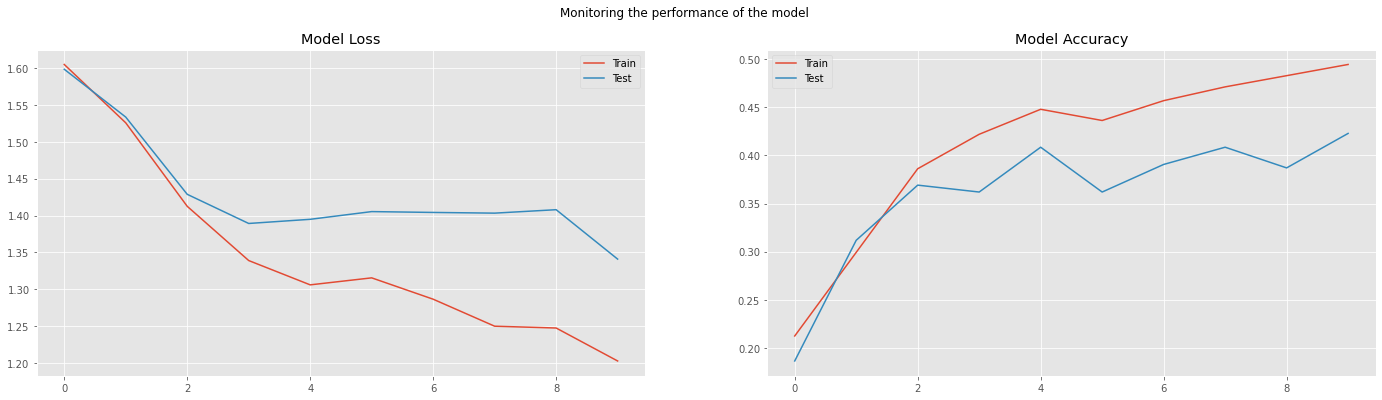



 Testing the model...


5/5 [==============================] - 1s 40ms/step - loss: 1.3157 - accuracy: 0.5116

Test score: 1.3157297372817993

Test accuracy: 0.5116279125213623

Accuracy: 51.16%


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


2/2 [==============================] - 0s 30ms/step
              precision    recall  f1-score   support

           0       0.87      0.54      0.67        37
           1       0.00      0.00      0.00         2
           2       0.14      0.50      0.22         2
           3       0.20      0.50      0.29         2
           4       0.00      0.00      0.00         0

    accuracy                           0.51        43
   macro avg       0.24      0.31      0.23        43
weighted avg       0.76      0.51      0.60        43



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


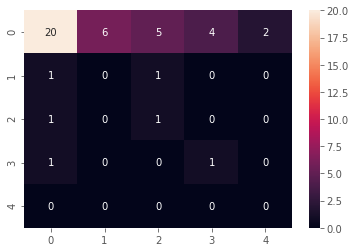

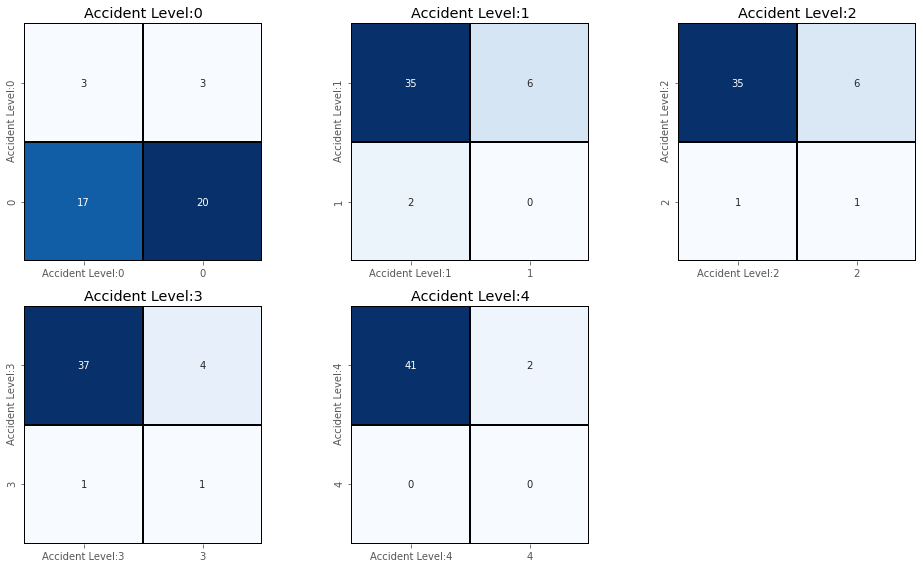


 Saving w2v mode::
INFO:tensorflow:Assets written to: w2v_model_dir/assets


127.0.0.1 - - [25/Apr/2021 06:35:56] "POST /all HTTP/1.1" 200 -



 Found 22 unique tokens.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


9/9 [==============================] - 0s 13ms/step


127.0.0.1 - - [25/Apr/2021 06:41:00] "POST /predict HTTP/1.1" 200 -



Prediction class: 1


In [76]:
if __name__ == "__main__":
  app.run()